In [1]:
from sectionproperties.pre.geometry import CompoundGeometry
from sectionproperties.analysis.section import Section
import sectionproperties.pre.library.steel_sections as steel_sections
import sectionproperties.pre.library.primitive_sections as sections
import matplotlib.pyplot as plt

In [2]:
#All inputs
width = 5
height = 3
thck = 0.3125
r_out = 0.625
dist_bottoms = 0.5
plate_thck = 1
plate_height = 4
angle_plate_width = 2.5
angle_plate_height = 2.5
angle_plate_thck = 0.25
angle_toe_radius = 0.225
angle_root_radius = 0.225

In [3]:
#Section - 1
geometry = steel_sections.rectangular_hollow_section(d = height, b = width, t = thck, r_out = r_out, n_r = 30)

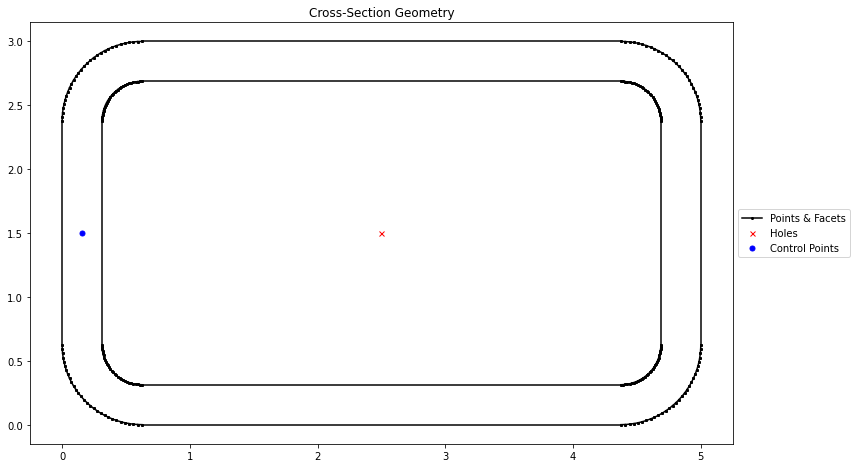

In [4]:
ax = geometry.plot_geometry(figsize=(12, 7), render=False, labels=[])
plt.show()

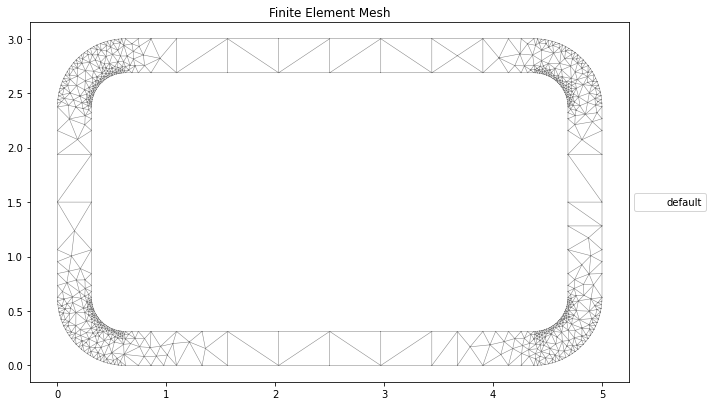

<AxesSubplot:title={'center':'Finite Element Mesh'}>

In [5]:
geometry.create_mesh(mesh_sizes = [0.1])
section = Section(geometry)
section.plot_mesh(figsize = (10,10))

In [6]:
section.calculate_geometric_properties()

In [7]:
(zxx_01, zxx_02, _, _) = section.get_z()
if (zxx_01 < zxx_02):
    section_1_modulus = zxx_01
else:
    section_1_modulus = zxx_02
print(section_1_modulus)

3.896594129650797


In [8]:
#Section - 2
geometry_1 = steel_sections.rectangular_hollow_section(d = width, b = height, t = thck, r_out = r_out, n_r = 30)

In [9]:
plate_left = sections.rectangular_section(d = plate_height, b = plate_thck)
plate_right = sections.rectangular_section(d = plate_height, b = plate_thck)

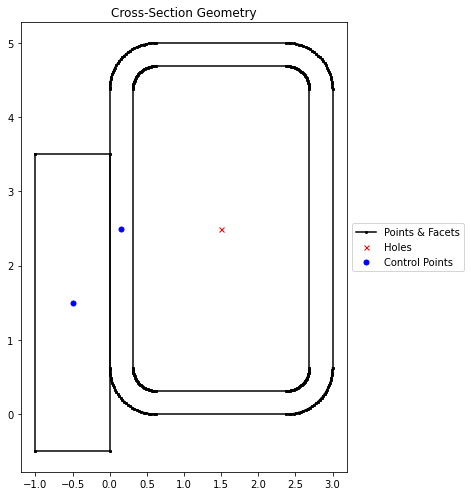

In [10]:
plate_left = plate_left.shift_section(x_offset = -(plate_thck), y_offset = -(dist_bottoms))
if (plate_thck or plate_height != 0):
    geom = geometry_1 + plate_left
else:
    geom = geometry_1
ax = geom.plot_geometry(figsize=(12, 7), render=False, labels=[])
plt.show()

In [11]:
plate_right = plate_left.shift_section(x_offset = height + plate_thck, y_offset = 0)

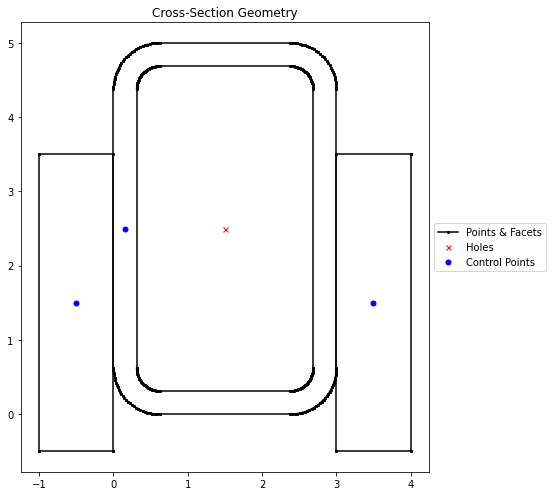

In [12]:
if (plate_thck or plate_height != 0):
    sec_geom = geom + plate_right
else:
    sec_geom = geom
ax = sec_geom.plot_geometry(figsize=(12, 7), render=False, labels=[])
plt.show()

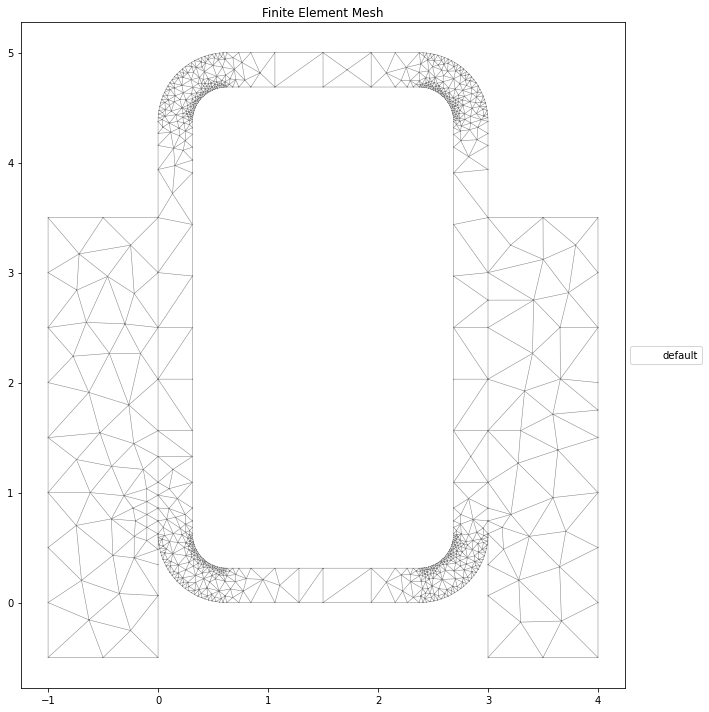

<AxesSubplot:title={'center':'Finite Element Mesh'}>

In [13]:
sec_geom.create_mesh(mesh_sizes = [0.1])
section_1 = Section(sec_geom)
section_1.plot_mesh(figsize = (10,10))

In [14]:
section_1.calculate_geometric_properties()
(zxx_11, zxx_12, _, _) = section_1.get_z()
if (zxx_11 < zxx_12):
    section_2_modulus = zxx_11
else:
    section_2_modulus = zxx_12
print(section_2_modulus)

8.472105554931797


In [15]:
section_1.display_mesh_info()

Mesh Statistics:

- 3349 nodes

- 1505 elements

- 3 regions

In [16]:
#Section - 3
geometry_2 = steel_sections.rectangular_hollow_section(d = height, b = width, t = thck, r_out = r_out, n_r = 30)
angle = steel_sections.angle_section(d = angle_plate_width, b = angle_plate_height, t = angle_plate_thck, 
                                     r_r = angle_root_radius, r_t = angle_toe_radius, n_r = 30)

In [17]:
angle = angle.rotate_section(270, [0,0])
angle = angle.shift_section(x_offset = -(angle_plate_thck), y_offset = height + angle_plate_thck)

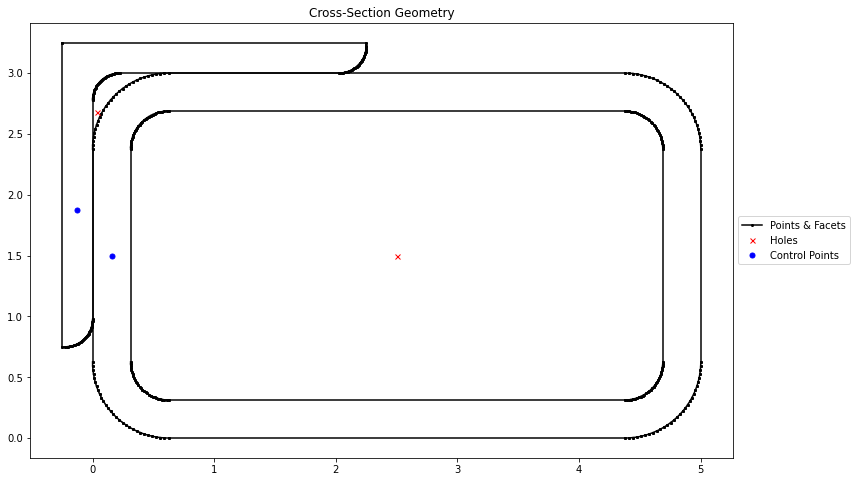

In [18]:
if (angle_plate_height and angle_plate_width != 0):
    section_geometry = geometry_2 + angle
else:
    section_geometry = geometry_2
ax = section_geometry.plot_geometry(figsize=(12, 7), render=False, labels=[])
plt.show()

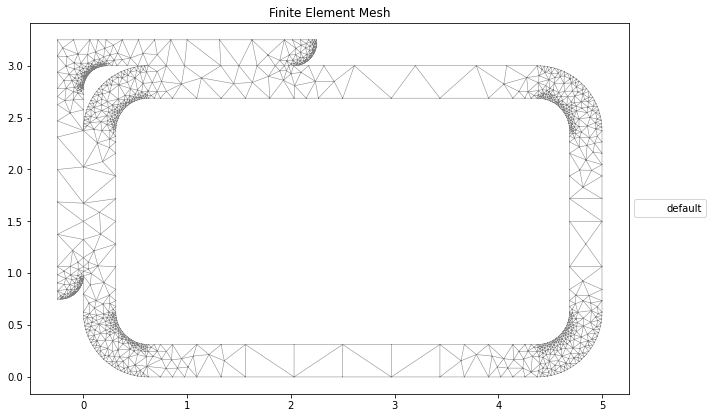

<AxesSubplot:title={'center':'Finite Element Mesh'}>

In [19]:
section_geometry.create_mesh(mesh_sizes = [0.1])
section_2 = Section(section_geometry)
section_2.plot_mesh(figsize = (10,10))

In [20]:
section_2.display_mesh_info()

Mesh Statistics:

- 4471 nodes

- 2008 elements

- 2 regions

In [21]:
section_2.calculate_geometric_properties()
(zxx_21, zxx_22, _, _) = section_2.get_z()
if (zxx_21 < zxx_22):
    section_3_modulus = zxx_21
else:
    section_3_modulus = zxx_22
print(section_3_modulus)

4.371652547297333


In [22]:
print(section_1_modulus)
print(section_2_modulus)
print(section_3_modulus)

3.896594129650797
8.472105554931797
4.371652547297333
